In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
import seaborn as sns
from scipy import stats as st
import statsmodels as sts
%matplotlib inline

In [2]:
csv_URL = "http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv"
df2 = pd.read_csv(csv_URL)
df2=df2.head(20000)

In [3]:
print(df2.neighbourhood.nunique())
print(df2.neighbourhood_group.nunique())
print(df2.room_type.nunique())
print(df2.last_review.nunique)

213
5
4
<bound method IndexOpsMixin.nunique of 0        2022-07-18
1        2018-10-19
2        2019-11-12
3               NaN
4        2022-07-11
            ...    
19995           NaN
19996           NaN
19997           NaN
19998           NaN
19999    2022-08-29
Name: last_review, Length: 20000, dtype: object>


In [4]:
df2 = df2.drop(["neighbourhood","last_review","host_name","host_id","id","license",'reviews_per_month','license','name'],axis=1)

In [5]:
df2 = df2.drop(['latitude','longitude'],axis=1)

In [6]:
df2.shape

(20000, 8)

In [7]:
df2.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,175.623600,23.559450,39.173650,7.843650,87.927250,5.972200
std,365.290278,33.539693,69.815032,40.400555,125.678553,15.926215
min,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,74.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,119.000000,30.000000,9.000000,1.000000,0.000000,0.000000
75%,190.000000,30.000000,44.000000,2.000000,170.250000,3.000000
max,16500.000000,1250.000000,1384.000000,453.000000,365.000000,793.000000


In [8]:
bins = np.arange(df2.price.min(), 2000+20, 20)

(array([1.410e+02, 1.608e+03, 2.648e+03, 2.530e+03, 2.336e+03, 1.793e+03,
        1.266e+03, 1.561e+03, 1.109e+03, 1.026e+03, 5.800e+02, 3.260e+02,
        5.160e+02, 2.830e+02, 3.940e+02, 1.690e+02, 1.360e+02, 1.990e+02,
        1.300e+02, 1.710e+02, 9.600e+01, 6.100e+01, 1.040e+02, 4.600e+01,
        1.130e+02, 2.500e+01, 2.800e+01, 4.200e+01, 1.300e+01, 4.800e+01,
        1.900e+01, 1.700e+01, 3.100e+01, 1.900e+01, 2.200e+01, 1.200e+01,
        1.700e+01, 2.700e+01, 1.200e+01, 4.200e+01, 4.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 2.300e+01, 6.000e+00, 5.000e+00, 7.000e+00,
        4.000e+00, 4.800e+01, 3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.200e+01,
        3.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 9.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+0

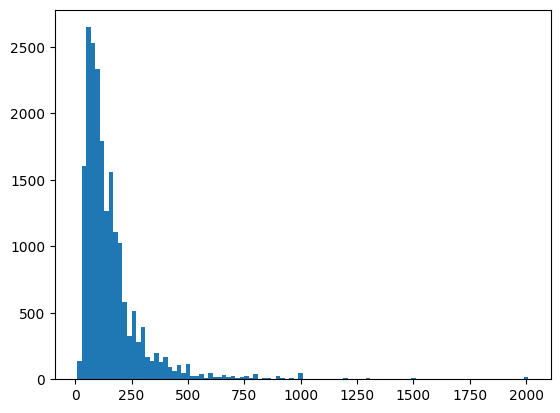

In [9]:
plt.hist(df2.price,bins=bins)

In [10]:
df2 = df2[df2['price'] <= 500]

(array([2938., 6219., 4121., 2693., 1302.,  799.,  467.,  364.,  227.,
         201.]),
 array([ 10.,  59., 108., 157., 206., 255., 304., 353., 402., 451., 500.]),
 <BarContainer object of 10 artists>)

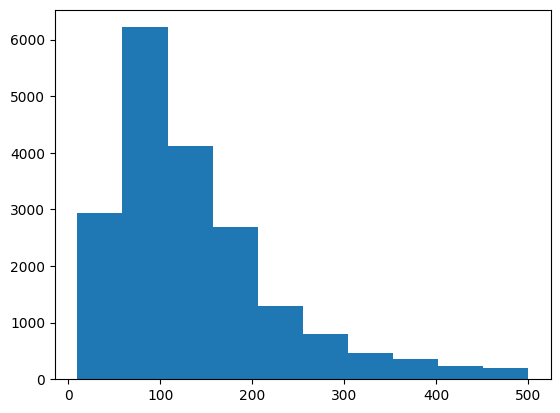

In [11]:
plt.hist(df2.price)

In [ ]:
# Naive bayes algorithm solves classification problems. But in this dataset classification won't be an easy task.
# Even though we tried K-nn classification but dividing the price's into 2 classes as following.

In [ ]:
# with regression we can predict price, dataset we 
# filtered for our analysis doesn't look appropriate for predicting mode price of any new neighbourhood
# However, we tried to predict the price.

In [12]:
def add_column(df2_p):
    price_class=[]
    for i in df2_p:
        if i<250:
            price_class.append(1)
        else:
            price_class.append(0)
    price_class = pd.Series(price_class)
    return price_class

In [13]:
df2=pd.concat([df2,pd.DataFrame(add_column(df2.price))],axis=1)

In [14]:
df2.rename(columns={0:'PriceClass'},inplace=1)

In [15]:
df2.dropna(inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18703 entries, 0 to 19330
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             18703 non-null  object 
 1   room_type                       18703 non-null  object 
 2   price                           18703 non-null  float64
 3   minimum_nights                  18703 non-null  float64
 4   number_of_reviews               18703 non-null  float64
 5   calculated_host_listings_count  18703 non-null  float64
 6   availability_365                18703 non-null  float64
 7   number_of_reviews_ltm           18703 non-null  float64
 8   PriceClass                      18703 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


In [23]:
import sklearn as skl
from sklearn.naive_bayes import MultinomialNB
X = pd.get_dummies(data=df2.drop('price', axis=1), 
                   columns=['room_type','neighbourhood_group'],
                   prefix = ['room_type','neighbourhood_group'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18703 entries, 0 to 19330
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   minimum_nights                     18703 non-null  float64
 1   number_of_reviews                  18703 non-null  float64
 2   calculated_host_listings_count     18703 non-null  float64
 3   availability_365                   18703 non-null  float64
 4   number_of_reviews_ltm              18703 non-null  float64
 5   PriceClass                         18703 non-null  float64
 6   room_type_Entire home/apt          18703 non-null  uint8  
 7   room_type_Hotel room               18703 non-null  uint8  
 8   room_type_Private room             18703 non-null  uint8  
 9   room_type_Shared room              18703 non-null  uint8  
 10  neighbourhood_group_Bronx          18703 non-null  uint8  
 11  neighbourhood_group_Brooklyn       18703 non-null  uin

In [105]:
import sklearn as skl
from sklearn.naive_bayes import MultinomialNB
X_reg = pd.get_dummies(data=df2, 
                   columns=['room_type','neighbourhood_group'],
                   prefix = ['room_type','neighbourhood_group'])

X_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18703 entries, 0 to 19330
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              18703 non-null  float64
 1   minimum_nights                     18703 non-null  float64
 2   number_of_reviews                  18703 non-null  float64
 3   calculated_host_listings_count     18703 non-null  float64
 4   availability_365                   18703 non-null  float64
 5   number_of_reviews_ltm              18703 non-null  float64
 6   PriceClass                         18703 non-null  float64
 7   room_type_Entire home/apt          18703 non-null  uint8  
 8   room_type_Hotel room               18703 non-null  uint8  
 9   room_type_Private room             18703 non-null  uint8  
 10  room_type_Shared room              18703 non-null  uint8  
 11  neighbourhood_group_Bronx          18703 non-null  uin

In [107]:
y_reg = df2['price'].copy()
y.head()

0    308.0
1    299.0
2    425.0
3     60.0
4     75.0
Name: price, dtype: float64

In [24]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
minimum_nights,18703.0,23.846816,34.063806,1.0,4.0,30.0,30.0,1250.0
number_of_reviews,18703.0,40.297279,71.312327,0.0,2.0,9.0,46.0,1384.0
calculated_host_listings_count,18703.0,7.420360,38.545636,1.0,1.0,1.0,2.0,453.0
availability_365,18703.0,84.475539,123.628064,0.0,0.0,0.0,161.0,365.0
number_of_reviews_ltm,18703.0,5.949741,16.038644,0.0,0.0,0.0,3.0,793.0
PriceClass,18703.0,0.875742,0.329885,0.0,1.0,1.0,1.0,1.0
room_type_Entire home/apt,18703.0,0.542747,0.498183,0.0,0.0,1.0,1.0,1.0
room_type_Hotel room,18703.0,0.006149,0.078175,0.0,0.0,0.0,0.0,1.0
room_type_Private room,18703.0,0.437256,0.496061,0.0,0.0,0.0,1.0,1.0
room_type_Shared room,18703.0,0.013848,0.116863,0.0,0.0,0.0,0.0,1.0


In [25]:
y = df2['PriceClass'].copy()
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: PriceClass, dtype: float64

In [43]:

X.iloc[3]

minimum_nights                       30.0
number_of_reviews                     0.0
calculated_host_listings_count        1.0
availability_365                     83.0
number_of_reviews_ltm                 0.0
PriceClass                            1.0
room_type_Entire home/apt             0.0
room_type_Hotel room                  0.0
room_type_Private room                1.0
room_type_Shared room                 0.0
neighbourhood_group_Bronx             1.0
neighbourhood_group_Brooklyn          0.0
neighbourhood_group_Manhattan         0.0
neighbourhood_group_Queens            0.0
neighbourhood_group_Staten Island     0.0
Name: 3, dtype: float64

In [44]:
new_data_point = np.array([
   30.0,
   0.0,
1.0,   83.0,   0.0, 1.0,  0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,
])

In [26]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

In [108]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state for regression
train_y_reg,test_y_reg,train_X_reg,test_X_reg = train_test_split(y_reg, X_reg,
                                                 test_size=0.2,
                                                 random_state=123)

In [109]:
train_X_reg.shape

(14962, 16)

In [27]:
train_X.shape

(14962, 15)

In [28]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [110]:
from sklearn import preprocessing

# Create a scaler_reg to do the transformation
scaler_reg = preprocessing.MinMaxScaler().fit(train_X_reg)

In [111]:
# Transform training X_reg
train_X_scale_reg = scaler_reg.transform(train_X_reg)
train_X_scale_reg = pd.DataFrame(train_X_scale_reg)
train_X_scale_reg.columns = train_X_reg.columns


In [29]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns


In [113]:
# Transform test X_reg
test_X_scale_reg = scaler_reg.transform(test_X_reg)
test_X_scale_reg = pd.DataFrame(test_X_scale_reg)
test_X_scale_reg.columns = test_X_reg.columns


In [30]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns


In [31]:
print(train_X.shape)
print(train_y.shape)
print(test_y.shape)
print(test_X.shape)

print(train_y)

(14962, 15)
(14962,)
(3741,)
(3741, 15)
8246     1.0
13055    1.0
13691    1.0
9061     1.0
11759    1.0
        ... 
13793    1.0
7984     1.0
15817    1.0
18314    0.0
16189    1.0
Name: PriceClass, Length: 14962, dtype: float64


In [ ]:
df2.shape

In [120]:
# we performed classification based on price by converting price into 2 classes i.e less than 250 & greater than 250. 
# We used new variable called PriceClass to classify two classes.
# There was a class imbalance for greater and lower price when we 500 as the marginal value for both the classes.
# As greater than 500 very less in number compared to below 500. Majorly, in above 500 class there were very less
# values away from 500 compared to values nearer 500.
# To handle class imbalance values above 500 were removed as they are less in number.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Class 1','Class 2']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
# Print confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(test_y, y_pred)
print_cm(cm)


In [ ]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, y_pred)

In [90]:
#K-NN 
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)

In [91]:
knn5.fit(train_X_scale, train_y)


KNeighborsClassifier()

In [92]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [100]:
# h = .02
# x_min, x_max = X[: 0].min() - 1, X[: 0].max() + 1
# y_min, y_max = X[: 1].min() - 1, X[: 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
# np.arange(y_min, y_max, h))

In [93]:
from sklearn import metrics

# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[ 494    1]
 [   0 3246]]


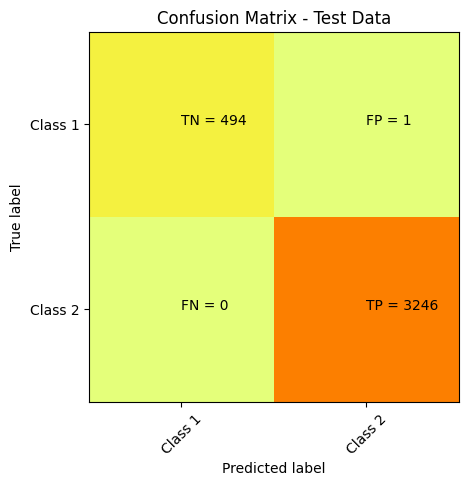

In [94]:
print_cm(cm)

In [99]:
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       495
         1.0       1.00      1.00      1.00      3246

    accuracy                           1.00      3741
   macro avg       1.00      1.00      1.00      3741
weighted avg       1.00      1.00      1.00      3741



In [ ]:
# Here we can see in the confusion matrix TN=494, Tp=3246, FP=1,FN=0
# Classification metrics shows the results are 100% correct
# Which implies the model is not correct fit.


In [ ]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_knn5)

In [45]:
import numpy as np
distances = np.linalg.norm(X - new_data_point, axis=1)

In [46]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([    3, 17051, 16334], dtype=int64)

In [47]:
nearest_neighbors = y[nearest_neighbor_ids]
nearest_neighbors

3        1.0
17051    1.0
16334    1.0
Name: PriceClass, dtype: float64

In [102]:
# import seaborn as sns
# cmap = sns.cubehelix_palette(as_cmap=True)
# f, ax = plt.subplots()
# points = ax.scatter(
#     test_X['PriceClass'], test_X['neighbourhood_group_Queens'], s=50, cmap=cmap
#  )
# f.colorbar(points)
# plt.show()

In [114]:
#K-nn Regression
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(train_X_reg,train_y_reg)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [50]:
gridsearch.best_params_

{'n_neighbors': 11}

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds_grid = gridsearch.predict(train_X_reg)
train_mse = mean_squared_error(train_y_reg, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(test_X_reg)
test_mse = mean_squared_error(test_y_reg, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_mse)
print(test_rmse)

5.018096327431847
30.811792747037334
5.550837121285161


In [128]:
# RSME error rates are very high. Which implies that performing K-nn regression did not show any good results.
# 

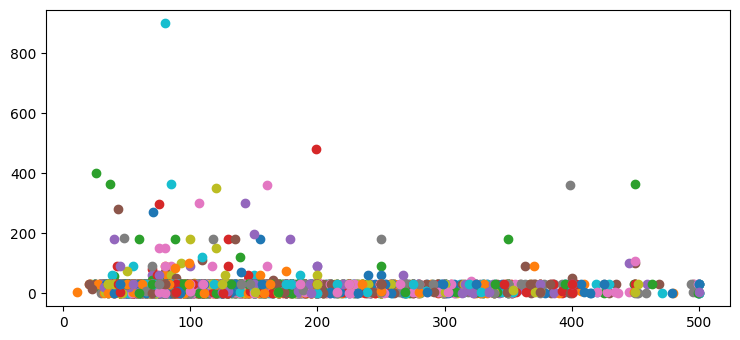

In [119]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = test_X_reg['price']
ys = test_X_reg['minimum_nights']
for x, y in zip(xs, ys):
   plt.scatter(x, y, cmap="copper")
plt.show()

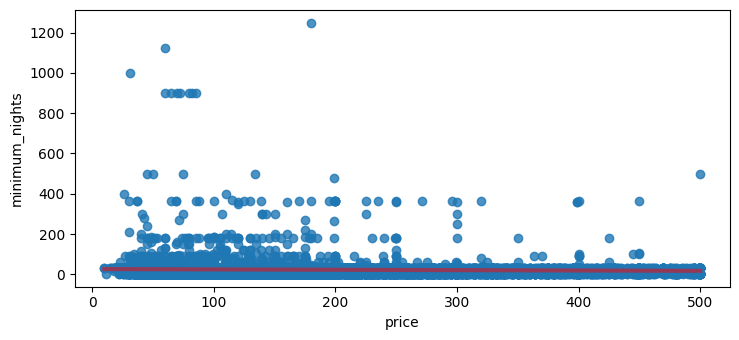

In [123]:
# Draw a scatter plot with linear regression line
sns.regplot(x="price", y="minimum_nights", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=X_reg)
plt.show()

In [126]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y)*100,2),"% for k =",k)

AUC is  99.9 % for k = 1
AUC is  99.9 % for k = 2
AUC is  99.9 % for k = 3
AUC is  99.9 % for k = 4
AUC is  99.9 % for k = 5
AUC is  99.9 % for k = 6
AUC is  99.9 % for k = 7
AUC is  99.9 % for k = 8
AUC is  99.9 % for k = 9
AUC is  99.9 % for k = 10
AUC is  99.9 % for k = 11
AUC is  99.9 % for k = 12
AUC is  99.29 % for k = 13
AUC is  99.29 % for k = 14
AUC is  98.38 % for k = 15
AUC is  98.38 % for k = 16
AUC is  98.38 % for k = 17
AUC is  98.48 % for k = 18
AUC is  98.48 % for k = 19
AUC is  98.48 % for k = 20


In [ ]:
# variables are able too accurate to draw a conclusion.